<a href="https://colab.research.google.com/github/raajprakash/APOLLO/blob/master/Perceptron_contour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


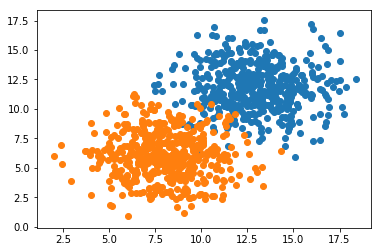

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

W0719 12:16:07.109647 139925217638272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 12:16:07.137915 139925217638272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 12:16:07.141254 139925217638272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 12:16:07.176478 139925217638272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 12:16:07.184427 139925217638272 deprecation_wrappe

Epoch 1/500
1000/1000 [==============================] - 0s 183us/step - loss: 1.5422 - acc: 0.5430
Epoch 2/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.6594 - acc: 0.6030
Epoch 3/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.4450 - acc: 0.8560
Epoch 4/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.3892 - acc: 0.8960
Epoch 5/500
1000/1000 [==============================] - 0s 23us/step - loss: 0.3459 - acc: 0.9040
Epoch 6/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.3131 - acc: 0.9230
Epoch 7/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.2938 - acc: 0.9320
Epoch 8/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.2657 - acc: 0.9390
Epoch 9/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.2391 - acc: 0.9570
Epoch 10/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.2232 - acc: 0.9630
Epoch 11

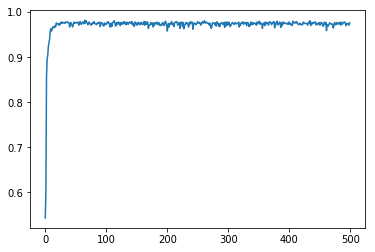

In [3]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam=Adam(lr = 0.1 )
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=50,epochs=500, shuffle='true')
plt.plot(h.history['acc'])

Text(0.5, 0, 'epoch')

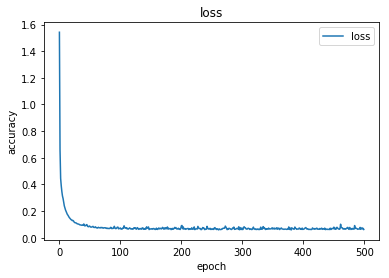

In [7]:
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

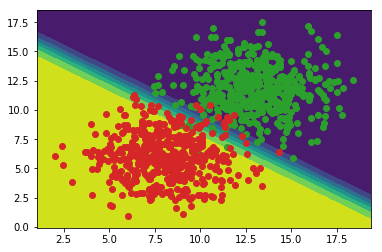

In [8]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
 
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

prediction is:  [[0.9999856]]


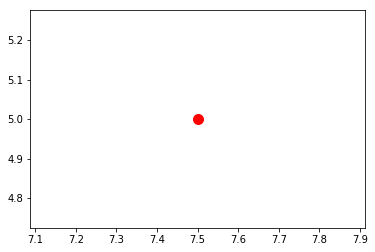

In [9]:
x = 7.5
y = 5
 
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)